# Datos de Marketing

Se propone un archivo CSV (`datos_marketing.csv`) de 2240 filas (clientes) con 28 columnas relacionadas con datos de marketing. 

Más específicamente, las columnas son:

* `id`: Identificador único del cliente (Considerada como la `primary-key`).

* `Year_Birth`: Año de nacimiento del cliente.

* `Education`: Nivel de educación del cliente.

* `Marital_Status`: Estado civil del cliente.

* `Income`: Ingreso familiar anual del cliente.

* `Kidhome`: Número de niños en el hogar del cliente.

* `Teenhome`: Número de adolescentes en el hogar del cliente.

* `Dt_Customer`: Fecha de alta del cliente en la plataforma de compras.

* `Recency`: Frescura del cliente, número de días desde la última compra del cliente,

* `MntWines`: Cantidad gastada en vino en los últimos 2 años.

* `MntFruits`: Cantidad gastada en fruta en los últimos 2 años. **(FALTABA)**

* `MntMeatProducts`: Cantidad gastada en carne en los últimos 2 años.

* `MntFishProducts`: Cantidad gastada en pescado en los últimos 2 años.

* `MntSweetProducts`: Cantidad gastada en dulces en los últimos 2 años.

* `MntSweetProducts`: Cantidad gastada en dulces en los últimos 2 años. **(REPE)**

* `MntGoldProds`: Cantidad gastada en oro en los últimos 2 años.

* `NumDealsPurchases`: Número de compras con descuentos.

* `NumWebPurchases`: Número de compras realizadas a través de la web de la empresa.

* `NumCatalogPurchases`: Número de compras realizadas a través del catálogo de la empresa. **(CORREGIDO)**

* `NumStorePurchases`: Número de compras realizadas en la tienda de la empresa.

* `NumWebVisitsMonth`: Número de visitas a la web de la empresa en el último mes.

* `AcceptedCmp1`: 1 si el cliente ha aceptado la oferta en la primera campaña que se le ha realizado. En caso contrario 0.

* `AcceptedCmp2`: 1 si el cliente ha aceptado la oferta en la segunda campaña que se le ha realizado. En caso contrario 0.

* `AcceptedCmp3`: 1 si el cliente ha aceptado la oferta en la tercera campaña que se le ha realizado. En caso contrario 0.

* `AcceptedCmp4`: 1 si el cliente ha aceptado la oferta en la cuarta campaña que se le ha realizado. En caso contrario 0.

* `AcceptedCmp5`: 1 si el cliente ha aceptado la oferta en la quinta campaña que se le ha realizado. En caso contrario 0.

* `Response`: 1 si el cliente ha aceptado la oferta en la última campaña que se le ha realizado. En caso contrario 0.

* `Complain`: 1 si el cliente ha realizado alguna queja en los últimos 2 años. En caso contrario 0.

* `Country`: Localización del cliente.

# Introducción

Vamos a ponernos en realizar un `roleplay` de analista de datos. El equipo de ventas y marketing nos ha pedido que las campañas de marketing recientes no han sido tan eficaces como se esperaba. Debemos analizar el conjunto de datos para comprender este problema y proponer soluciones basadas en datos.

## Tareas

* ¿Hay valores nulos o valores atípicos? ¿Cómo los disputará/manejará?
* ¿Hay alguna variable que justifique las transformaciones?
* ¿Hay alguna variable útil que pueda diseñar con los datos proporcionados?
* ¿Notas algún patrón o anomalía en los datos? 
* ¿Puede representarlo graficamente? (Aquí os ayudaremos)

# Importación de librerías



In [1]:
import numpy as np # Para trabajar con matrices
import pandas as pd # Para trabajar con bases de datos
import matplotlib.pyplot as plt # Para dibujar gráficos sencillos
import seaborn as sns # Para producir gráficos más atractivos y avanzados
import plotly.express as px # Para generar gráficos interactivos
import os # Para trabajar con el directorio de trabajo

# Lea el dataset

## Solución

In [2]:
datos_originales = pd.DataFrame(pd.read_csv("datos_marketing.csv")) # Leemos el csv, lo convertimos en DataFrame y lo guardamos en una variable
display(datos_originales) # Mostramos el DataFrame 
df = datos_originales.copy() # Hacemos una copia de los datos originales

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


# Use el comando .info() para ver información del `dataset`.

## Solución

In [3]:
df.info() #Hay un total de 2240 entradas (datos clientes) repartidos en 28 columnas (variables) 
# pero no se puede ver la información de todas las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Para arreglarlo, se puede hacer clic en "View as a scrollable element" para mostrar todos los datos.

Tras comprobar los datos, se puede ver que solo hay datos nulos en la columna `Income`.

También se pueden ver los tipos de datos que contienen las variables, donde la mayoría son números enteros y alguna variable son object (strings). Sin embargo, Dt_Customer podría ser transformada en una variable fecha de ser necesario, pero la variable `Income` no debería estar guardada como un object sino como un int, así que es algo que hay que arreglar.

# Use el comando .head() para ver las columas

¿Qué observa en la columna `'income'`?

## Solución

In [4]:
df.head() # A simple vista no se puede ver nada raro en los datos de Income. Sin embargo, si fuese un int, no podría tener el símbolo de la divisa.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
df["Income"] # Esto devolverá error, vamos a ver por qué

In [7]:
df.columns # El título de la columna "Income" tiene un espacio en blanco tanto al principio como al final

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [8]:
df[" Income "] # Ahora sí podemos ver los datos

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name:  Income , Length: 2240, dtype: object

In [9]:
df[" Income "].tolist() # Convertimos la columna en una lista, y así nos hemos asegurado de que los datos están en formato string

['$84,835.00 ',
 '$57,091.00 ',
 '$67,267.00 ',
 '$32,474.00 ',
 '$21,474.00 ',
 '$71,691.00 ',
 '$63,564.00 ',
 '$44,931.00 ',
 '$65,324.00 ',
 '$65,324.00 ',
 '$81,044.00 ',
 '$62,499.00 ',
 '$67,786.00 ',
 '$26,872.00 ',
 '$4,428.00 ',
 '$54,809.00 ',
 '$54,809.00 ',
 '$32,173.00 ',
 '$47,823.00 ',
 '$30,523.00 ',
 '$36,634.00 ',
 '$43,456.00 ',
 '$40,662.00 ',
 '$49,544.00 ',
 '$57,731.00 ',
 '$33,168.00 ',
 '$54,450.00 ',
 '$54,450.00 ',
 '$35,340.00 ',
 '$73,170.00 ',
 '$65,808.00 ',
 '$79,529.00 ',
 '$34,578.00 ',
 '$46,374.00 ',
 '$18,351.00 ',
 '$95,169.00 ',
 '$65,370.00 ',
 '$39,228.00 ',
 '$84,865.00 ',
 '$61,314.00 ',
 '$21,359.00 ',
 '$66,465.00 ',
 '$81,698.00 ',
 '$39,146.00 ',
 '$25,959.00 ',
 '$64,260.00 ',
 '$32,300.00 ',
 '$74,806.00 ',
 '$72,967.00 ',
 '$48,904.00 ',
 '$14,796.00 ',
 '$66,991.00 ',
 '$52,195.00 ',
 '$90,369.00 ',
 '$18,393.00 ',
 '$47,139.00 ',
 '$38,576.00 ',
 '$61,905.00 ',
 '$83,715.00 ',
 '$60,597.00 ',
 '$6,560.00 ',
 '$48,330.00 ',
 '$38,236.

# Tratamiento de la columna `'income'`

Trate la columna: 
* Eliminando el espacio del nombre de la columna. Puede usar la función `replace`.
* Quite el símbolo del dolar. Puede usar la función `replace`.
* Cambie la columna al tipo `float`. Puede usar la función `astype(...)`

## Solución

Quitamos el espacio en blanco de la columna `Income`

In [10]:
df.columns # df.columns antes de la transformación

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [11]:
df.columns = df.columns.str.replace(" ", "") # Queremos que el comando df.columns ahora incluya la siguiente transformación:
# Reemplaza los espacios en blanco en los strings de las columnas por nada, para eliminarlos simplemente.

In [12]:
df.columns # df.columns después de la transformación

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

Quitamos el símbolo de dólar de los datos.

In [13]:
df["Income"] # Datos antes de la transformación

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [14]:
df["Income"] = df["Income"].str.replace("$", "") # Mismo procedimiento que para cambiar el título de la columna, pero aplicado a los datos de la columna
df["Income"] 

0       84,835.00 
1       57,091.00 
2       67,267.00 
3       32,474.00 
4       21,474.00 
           ...    
2235    66,476.00 
2236    31,056.00 
2237    46,310.00 
2238    65,819.00 
2239    94,871.00 
Name: Income, Length: 2240, dtype: object

Cambiamos el tipo de dato de object a float

In [15]:
df["Income"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Income
Non-Null Count  Dtype 
--------------  ----- 
2216 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB


In [ ]:
df["Income"] = df["Income"].astype("float") # Esto dará un error porque hay valores con espacios

In [17]:
df["Income"] = df["Income"].str.replace(" ", "") # Quitamos también los espacios

In [ ]:
df["Income"] = df["Income"].astype("float") # Esto también dará error porque hay valores con comas

In [ ]:
df["Income"] = df["Income"].str.replace(",", "") # El valor de reemplazo también puede ser un guion bajo ("_") sin problemas

In [21]:
df["Income"] = df["Income"].astype("float")
df["Income"]

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

# Imprima de nuevo el dataset con `.head()` y compruebe los resultados

## Solución

In [22]:
df.head(10) # Hemos resuelto los problemas que tenía la columna "Income"

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,71691.0,0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,65324.0,0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,65324.0,0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


# Empecemos mirando los valores nulos de las columnas. 

Identifique el número de valores nulos en cada columna. 

Use el comando `isnull()` y la combinación de `isnull()` y `sum()` para lograrlo.

## Solución

In [28]:
df.info() # Revisamos que no todos los valores de Income son no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [29]:
df.isnull() #df.isnull() nos devuelve el df con True si el valor es nulo y False en caso contrario.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
df.isnull().sum() # con .sum() sumamos los True. Si añadiésemos otro .sum() sumaríamos todos los valores nulos de las columnas.

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

# ¿Qué columna tiene valores nulos?

¿Cuántos valores nulos ha conseguido detectar?

¿En qué columna/s?

A continuación use el siguiente código para representar la columna `'Income'` y trate de ver qué ocurre.



```python
plt.figure(figsize=(16, 8))
sns.histplot(datos['Income'])
plt.title('Distribucion de la columna "Income"', size=25)
plt.ylabel('Conteo');
```

Mire en el Eje X, ¿qué identifica en la figura? ¿Ve los valores nulos?



Según el comando anterior, vimos que en la columna `Income` hay un total de 24 valores nulos, los únicos en todos los datos

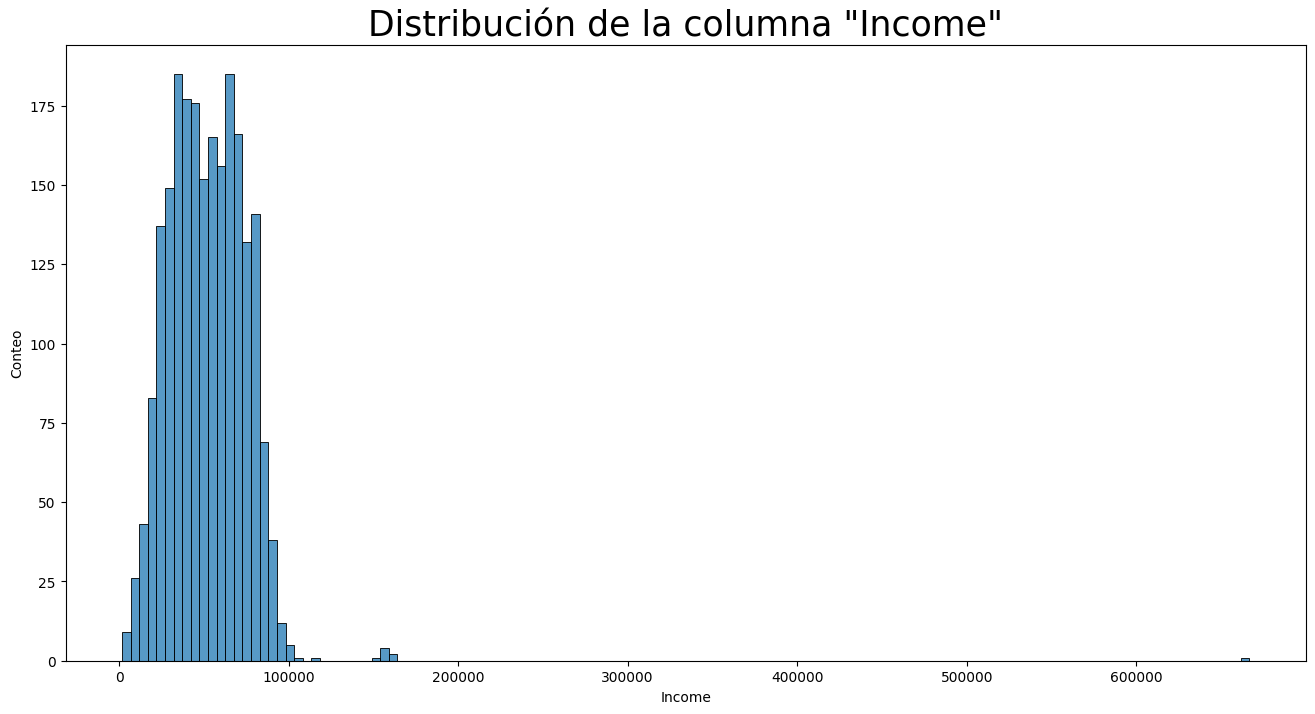

In [46]:
plt.figure(figsize=(16, 8))
sns.histplot(df['Income'])
plt.title('Distribución de la columna "Income"', size=25)
plt.ylabel('Conteo');

En la anterior figura se graficó un histograma con los datos de `Income`, en el que se agrupan los datos en pequeños intervalos y se suma la cantidad de datos que están contenidos dentro de esos intervalos (por ejemplo, cuántos clientes tenían un ingreso familiar anual de entre 10.000 y 14.999,99 dólares).

En el eje horizontal, x, se representa el ingreso familiar anual de los clientes. Por cada 100.000 dólares hay, aproximadamente, entre 19 y 20 intervalos, por lo que dichos intervalos tienen una amplitud de aproximadamente 5.000 - 5.260 dólares. Cuantos más clientes encajan dentro de un intervalo de ingresos, más alta será la barra, que indica el recuento de clientes con ciertas marcas orientativas, de 25 en 25. 

Gracias a este gráfico podemos ver que la mayoría de datos de ingresos están por debajo de los 100.000 dólares. De hecho, el 75% de los datos están por debajo de los 68.522 dólares. Con el comando describe podemos ver adicionalmente que el ingreso medio es de 52.247,25 dólares y la mediana de 51.381,5 dólares. Media y mediana sugieren una ligera asimetría positiva, es decir, la distribución está inclinada hacia la derecha, y hay valores elevados que "tiran" de la media hacia arriba.

Mediante este gráfico, no podemos ver los valores nulos, pues al no entrar en ninguna categoría numérica de ingresos, no se suman.

In [50]:
df["Income"].describe() # Ver rápidamente algunas estadísticas descriptivas de la columna "Income"

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<Axes: >

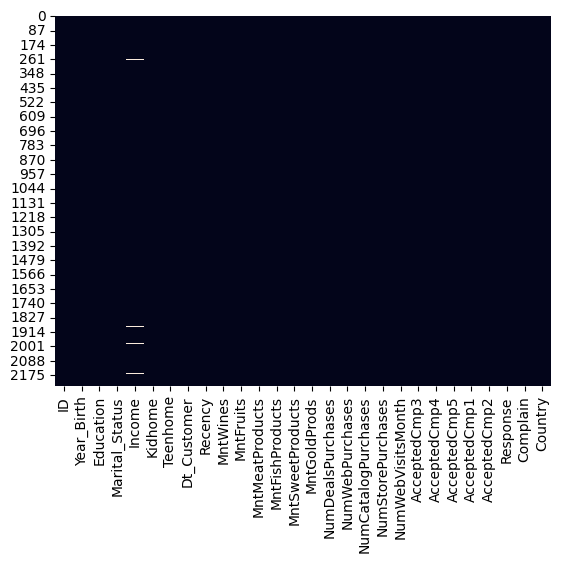

In [49]:
sns.heatmap(df.isnull(), cbar=False) # Otra forma de visualizar los valores nulos

Aquí se puede ver que los valores superiores a 118350.5 dólares son considerados valores atípicos, y que en estos datos hay un total de 8.


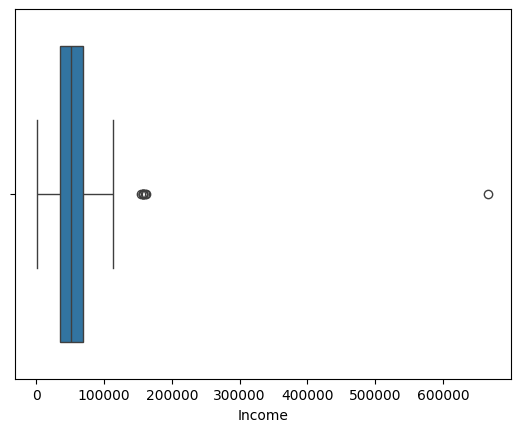

In [63]:
sns.boxplot(df["Income"], orient="h") # Otra forma de visualizar la distribución de la columna "Income"
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + IQR * 1.5
valores_atipicos = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

print(f"Aquí se puede ver que los valores superiores a {limite_superior} dólares son considerados valores atípicos, y que en estos datos hay un total de {len(valores_atipicos)}.")

# Rellene los valores nulos

Use la **mediana** de la columna para rellenar aquellos valores nulos.

La mediana puede ser calculada mediante `'.median()'`

## Solución

In [64]:
df["Income"].fillna(df["Income"].median(), inplace=True) # Sustituimos los valores nulos por la mediana de los datos. Además, guardamos los cambios
# en el propio dataframe df sin necesidad de tener que asignarle estos cambios a una nueva variable.
df.isnull().sum() # Ningún datos es nulo ahora

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

<Axes: >

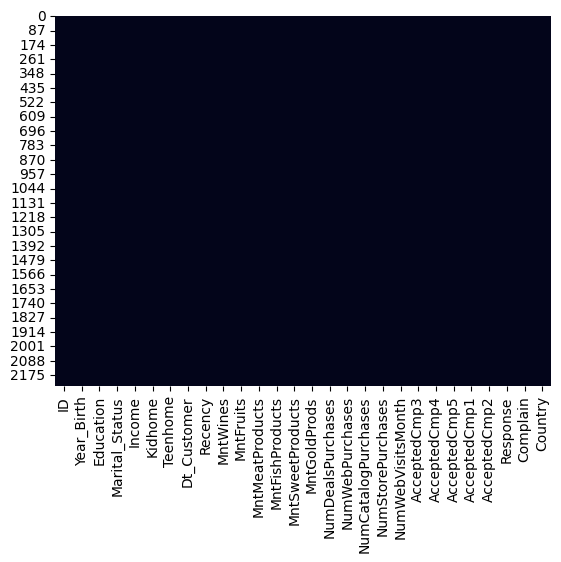

In [70]:
sns.heatmap(df.isnull(), cbar=False) # El gráfico está completamente vacío, no hay valores nulos

# ¿Requiere alguna columna de realizar una transformación?

Mire la columna `Dt_Customer`. Cambie el tipo de columna a `Datetime`.

Puede usar la función `to_datetime()`.

## Solución

In [68]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]) # Convertimos la columna "Dt_Customer" a formato datetime
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


# Otras tareas de ingeniería de datos que podemos hacer para facilitar la vida al equipo de ventas y marketing

Revise una lista de los nombres de columnas a continuación, a partir de los cuales podemos crear nuevas:

* Es posible crear una nueva columna con el número total de menores de edad en el hogar (nueva columna `'Dependents'`) a partir de la suma de `'Kidhome'` y `'Teenhome'`.

* Es posible tener a mano el año de cuando el cliente compró por primera vez (nueva columna `'Year_Customer'`)  partir de `'Dt_Customer'`.

* La cantidad total gastada (nueva columna `"TotalMnt"`) se puede crear a partir de la suma de todas las columnas que contienen la palabra clave `'Mnt'`.

* Las compras totales (nueva columna `"TotalPurchases"`) se pueden diseñar a partir de la suma de todas las columnas que contienen la palabra clave `'Purchases'`.

* El número total de campañas aceptadas por clientes (nueva columna `'TotalCampaignsAcc'`) se puede diseñar a partir de la suma de todas las columnas que contienen las palabras clave `'Cmp'` y `'Response'` (significa que es la última campaña).


## Solución

